In [28]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100
from scipy.optimize import linprog

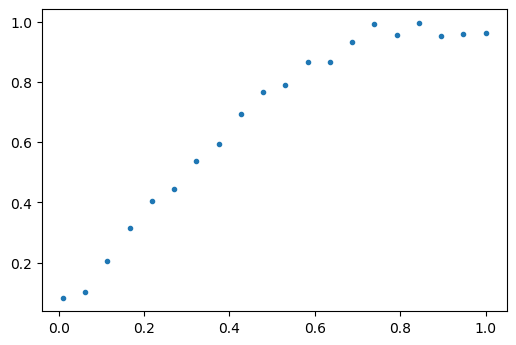

In [48]:
N = 20
x_range = np.linspace(0.01, 1, num=N)
y_range = np.sin(np.pi / 2 * x_range) + np.random.sample(len(x_range)) / 10
for i in range(len(y_range)):
    if y_range[i] > 1:
        y_range[i] = 2 - y_range[i]
plt.plot(x_range, y_range, 'o', markersize=3)


plt.show()

<h1>Linear programming</h1>

In [49]:

def minimize_poly (x_arr, y_arr, left, right, degree=5):
    A = []
    A_equal = []
    b_equal = []
    b = []
    length = right - left + 1 #number of points
    c = [1] * length
    for j in range(degree):
        c.append(0)
    for ind in range(left, right + 1):
        #first length -- err, next degree -- coeffs
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[ind] ** (a + 1))
        aux[ind - left] = -1
        A.append(aux)
        b.append(y_range[ind])
        
        aux = [-x for x in aux]
        aux[ind - left] = -1
        A.append(aux)
        b.append(-y_range[ind])
    #y(x_i) <= y(x_{i+1})
    for ind in range(left, right):
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[ind] ** (a + 1) - x_range[ind + 1] ** (a + 1))
        A.append(aux)
        b.append(0)

    #left and right values
    if left == 0:
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[left] ** (a + 1))
        A_equal.append(aux)
        b_equal.append(0)
    if right == len(x_range) - 1:
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[right] ** (a + 1))
        A_equal.append(aux)
        b_equal.append(1)

    if A_equal != []:   
        return linprog(c, A_ub=A, b_ub=b, A_eq=A_equal, b_eq=b_equal, bounds=(-100, 100))
    return linprog(c, A_ub=A, b_ub=b, bounds=(-100, 100))


def minimize_der(x_arr, y_arr, degree, opt_l1):
    A = []
    A_equal = []
    b_equal = []
    b = []
    length = len(x_range)
    for ind in range(length):
        #first length -- err, next degree -- coeffs, last one -- max of deriv
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[ind] ** (a + 1))
        aux[ind] = -1
        aux.append(0)
        A.append(aux)
        b.append(y_range[ind])
        
        aux = [-x for x in aux]
        aux[ind] = -1
        A.append(aux)
        b.append(-y_range[ind])
        
        #derivative at each x_i <= last
        aux = [0] * length
        for a in range(1, degree + 1):
            aux.append(a * x_range[ind] ** (a - 1))
        aux.append(-1)
        A.append(aux)
        b.append(0)

    #y(x_i) <= y(x_{i+1})
    for ind in range(len(x_range) - 1):
        aux = [0] * length
        for a in range(degree):
            aux.append(x_range[ind] ** (a + 1) - x_range[ind + 1] ** (a + 1))
        aux.append(0)
        A.append(aux)
        b.append(0)
    
    #right == len(x_range) - 1
    aux = [0] * length
    for a in range(degree):
        aux.append(x_range[len(x_range) - 1] ** (a + 1))
    aux.append(0)
    A_equal.append(aux)
    b_equal.append(1)
    
    #opt l1
    aux = [1] * length
    for i in range(degree + 1):
        aux.append(0)
    A.append(aux)
    b.append(opt_l1 + 0.01)
    
    c = [0] * (length + degree + 1)
    c[-1] = 1
    
    return linprog(c, A_ub=A, b_ub=b, A_eq=A_equal, b_eq=b_equal, bounds=(-100, 100))


def poly(x, params):
    acm = 0.0
    for j in range(len(params)):
        acm += (x ** int(j + 1)) * params[j]
    return acm

out is [ -0.24203633  25.14743297 -95.43663966  99.99535183  78.32600359
 -99.98757789 -99.97811226 -39.23769579  99.94746084  99.94377665
  99.85337314 -52.46143574 -99.60063127 -99.46604921 -93.69528186
  99.9998053   99.58012433  87.61503872 -99.61123089  -9.69177339] fun is 0.49114250467211207
out is [ 1.25582369e-02 -3.64209726e-01  4.93789508e+00 -3.25326074e+01
  9.82875797e+01 -9.99130192e+01 -6.97180008e+01  9.99781238e+01
  9.99814162e+01 -1.83113766e+01 -9.98872546e+01 -9.99817087e+01
  4.22210138e+01  9.89431317e+01  9.52585339e+01 -9.92958707e+01
 -9.99995439e+01  9.59120652e+01 -1.61039760e+01  1.57540458e+00] fun is 1.5754045809068913


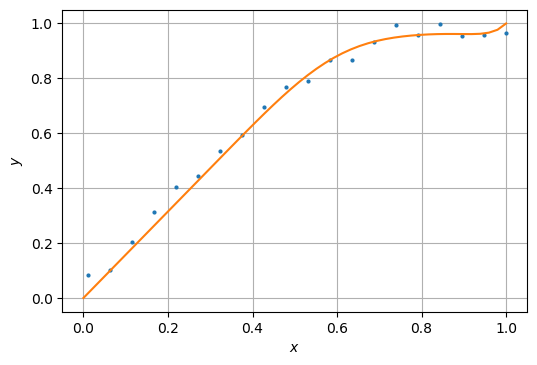

In [54]:
DEGREE = N
plt.plot(x_range, y_range, 'o', markersize=2)

#min l1-norm
out = minimize_poly(x_range, y_range, 0, N - 1, degree=DEGREE)
print('out is', out.x[-DEGREE:], 'fun is', out.fun)
y_ans = [poly(x, out.x[-DEGREE:]) for x in np.linspace(0, 1)]
#plt.plot(np.linspace(0, 1), y_ans)

#min_der
out = minimize_der(x_range, y_range, DEGREE, out.fun)
print('out is', out.x[-DEGREE:], 'fun is', out.fun)
y_ans = [poly(x, out.x[-(DEGREE + 1):-1]) for x in np.linspace(0, 1)]
plt.plot(np.linspace(0, 1), y_ans)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid()
plt.savefig('minDer.png')
plt.show()

<h1>Dynamic Programming</h1>

L_1-norm is 0.321801548950635
max der is 2.3030303030303023


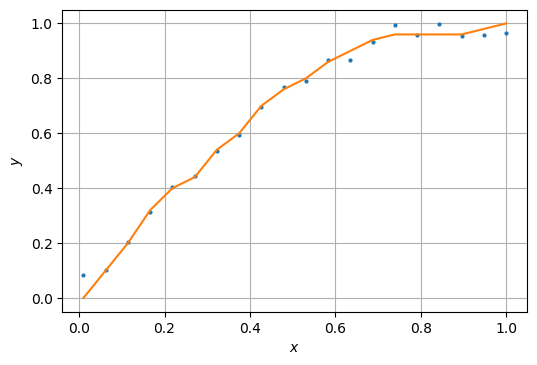

In [51]:
def getNorm(x_range, y_range, i, j, y_l, y_r): #get L_1 norm from [i, j]
    acm = 0.0
    if i == j:
        return np.abs(y_range[i] - y_r)
    for k in range(i, j + 1):
        acm += np.abs(y_l + (y_r - y_l)/(x_range[j] - x_range[i]) * (x_range[k] - x_range[i]) - y_range[k])
    return acm

K = 50
dp = [[np.inf] * (K + 1) for i in range(N)]
der = [[np.inf] * (K + 1) for i in range(N)]
p = [[-1] * (K + 1) for i in range(N)]
for i in range(K):
    der[0][i] = 0
dp[0][0] = y_range[0]
for i in range(1, N):
    for j in range(K + 1):
        for q in range(i): #left border of a line
            for k in range(j + 1):
                dp[i][j] = min(dp[i][j], dp[q][k] + getNorm(x_range, y_range, q + 1, i, k/K, j/K))
for i in range(1, N):
    for j in range(K + 1):
        for q in range(i): #left border of a line
            for k in range(j + 1):
                if dp[i][j] == dp[q][k] + getNorm(x_range, y_range, q + 1, i, k/K, j/K):
                    if max(der[q][k], (j - k)/(K * (x_range[i] - x_range[q]))) < der[i][j]:
                        der[i][j] = max(der[q][k], (j - k)/(K * (x_range[i] - x_range[q])))
                        p[i][j] = [q, k]
# print(dp[-1])
# print(der[-1])
# print(p[-1])

i = N - 1
j = K
x_ans = [] #indecies of x_range
y_ans = [] #y(x_ans)
while p[i][j] != -1:
    y_ans.append(j / K)
    x_ans.append(i)
    pair = p[i][j]
    i = pair[0]
    j = pair[1]
y_ans.append(j / K)
x_ans.append(i)

#reverse
x_ans = x_ans[::-1]
y_ans = y_ans[::-1]
#calculate L_1-norm

acm = np.abs(y_range[-1] - 1)
for i in range(1, len(x_ans)):
    acm += getNorm(x_range, y_range, x_ans[i - 1], x_ans[i], y_ans[i - 1], y_ans[i])
    acm -= np.abs(y_range[x_ans[i]] - y_ans[i])
print('L_1-norm is', acm)

acm = 0.0
for i in range(1, len(x_ans)):
    acm = max(acm, (y_ans[i] - y_ans[i - 1])/(x_range[x_ans[i]] - x_range[x_ans[i - 1]]))
print('max der is', acm)

plt.plot(x_range, y_range, 'o', markersize=2)
plt.plot([x_range[i] for i in x_ans], y_ans)

plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.savefig('dynProg.png')
plt.show()